# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [39]:
import numpy as np
from glob import glob

# For the sake of a later step, I decided to 
# place the images in a data_images folder.

# load filenames for human and dog images
human_files = np.array(glob("data_images/humans/*/*"))
dog_files = np.array(glob("data_images/dogs/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


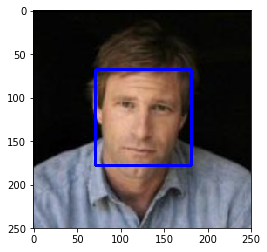

In [40]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [37]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [94]:
from tqdm import tqdm
from collections import Counter

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# Define counters
counters = {
    'human': Counter(),
    'dog': Counter()
}

def count_faces(files, counter):
    ## Track total files given
    counter['tests'] = len(files)
    ## Detect a face for every image
    for file in tqdm(files):
        if face_detector(file):
            counter['faces'] += 1

## Count faces in human umages and dog images
count_faces(human_files_short, counters['human'])
count_faces(dog_files_short, counters['dog'])
        
human_accuracy = counters['human']['faces'] / counters['human']['tests']
dog_accuracy = (1 - counters['dog']['faces'] / counters['dog']['tests'])

# "Face Detector:\nOut of {} tests, {:.3f} accuracy".format(total_tests, accuracy),
print("Human Images: Faces {} - Images {} - Accuracy {:.3f}".format(counters['human']['faces'], counters['human']['tests'], human_accuracy),
      "\nDog Images: Faces {} - Images {} - Accuracy {:.3f}".format(counters['dog']['faces'], counters['dog']['tests'], dog_accuracy),
      "\nReliability: {:.3f}".format((human_accuracy + dog_accuracy) / 2))


100%|██████████| 100/100 [00:09<00:00, 12.52it/s]


Human Images: Faces 96 - Images 100 - Accuracy 0.960 
Dog Images: Faces 18 - Images 100 - Accuracy 0.820 
Reliability: 0.890


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [46]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    print('Using cuda')
    VGG16 = VGG16.cuda()

Using cuda


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [95]:
from PIL import Image
from torch.autograd import Variable
import torchvision.transforms as transforms


def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    # Steps to take:
    # 1) resize the image to 256 x 256 then crop the center out at 224x224.
    # 2) normalize it with mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225] (docs)
    # 3) convert it to a PyTorch Tensor.

    # Handle transforms using torchvision     
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.RandomResizedCrop(224), 
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])
    # Load image and run through transform      
    image = transform(Image.open(img_path))
    
    
    # Pretrained models for PyTorch expect the Tensor dimensions to be the following
    # 
    # (NUMBER_OF_INPUT_IMAGES, NUMBER_OF_COLOR_CHANNLES, HEIGHT, WIDTH).
    #
    # We can insert a new dimension using unsqueeze method on tensor
    # to make change from [3, 224, 224] to [1, 3, 224, 224]
    image = image.unsqueeze(0)

    # Prediction placeholder
    prediction = False
    
    # Depending on whether cuda is being used, make sure the passed tensor
    # is being moved between the cpu and GPU pre/post calculation.
    if use_cuda:
        # We can now make our prediction by passing the image_variable through the
        # VGG16 network to get a prediction.
        prediction = VGG16.forward(Variable(image).cuda()).cpu()
    else:
        # We can now make our prediction by passing the image_variable through the
        # VGG16 network to get a prediction.
        prediction = VGG16.forward(Variable(image))
    
    # NOTE! PyTorch expects to have it's inputs be Variables. The PyTorch Variable object is utility
    # class that takes a tensor as an argument and achieves our goal.

    # To access the index of the highest predicted class value, we access
    # the data of the prediction and find the index of it's highest propbablity
    return prediction.data.numpy().argmax()

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [96]:
### returns "True" if a dog is detected in the image stored at img_path
dog_labels_range = range(151, 269)

def dog_detector(img_path, model='vgg16'):
    ## TODO: Complete the function.
    if model == 'vgg16':
        return VGG16_predict(img_path) in dog_labels_range
    elif model == 'vgg19':
        return VGG19_predict(img_path) in dog_labels_range

dog_detector('data_images/dogs/train/001.Affenpinscher/Affenpinscher_00001.jpg')

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def dog_detection_benchmark(images, has_dogs=True, model='vgg16'):
    # Define counter
    counter = Counter()
    
    # Track number of tests
    image_count = len(images)

    for i in range(image_count):
        # If image has face     
        if dog_detector(images[i], model=model):
            counter['dog_images'] += 1

    # Calculate out results
    accuracy = counter['dog_images'] / image_count

    if has_dogs is False:
        accuracy = 1 - accuracy

    # Print performance
    wwo = 'Evaluating images {} dogs'.format('with' if has_dogs else 'without')
    print("\n{} model correctly classifed {:.3f}% of {} images {} dogs".format(model, accuracy * 100, image_count, wwo))


In [9]:
# Dog detection performance for vgg16 model
dog_detection_benchmark(dog_files_short)
dog_detection_benchmark(human_files_short, has_dogs=False)


vgg16 model correctly classifed 91.000% of 100 images Evaluating images with dogs dogs

vgg16 model correctly classifed 99.000% of 100 images Evaluating images without dogs dogs


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
# define vgg19 model
VGG19 = models.vgg19(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG19 = VGG19.cuda()

In [11]:
# Prepare image using transforms for resnet input and incapsulate logic in a method.
def VGG19_predict(img_path):
    # Handle transforms using torchvision     
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.RandomResizedCrop(224), 
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])
    # Load image and run through transform      
    image = transform(Image.open(img_path))
    # Add dimension to tensor for number of images
    image = image.unsqueeze(0)
    # Prediction placeholder
    prediction = False
    # Depending on whether cuda is being used, make sure the passed tensor
    # is being moved between the cpu and GPU pre/post calculation.
    if use_cuda:
        # We can now make our prediction by passing the image_variable through the
        # VGG16 network to get a prediction.
        prediction = VGG19.forward(Variable(image).cuda()).cpu()
    else:
        # We can now make our prediction by passing the image_variable through the
        # VGG16 network to get a prediction.
        prediction = VGG19.forward(Variable(image))

    # To access the index of the highest predicted class value, we access
    # the data of the prediction and find the index of it's highest propbablity
    return prediction.data.numpy().argmax()


dog_detection_benchmark(dog_files_short, model='vgg19')
dog_detection_benchmark(human_files_short, has_dogs=False, model='vgg19')


vgg19 model correctly classifed 92.000% of 100 images Evaluating images with dogs dogs

vgg19 model correctly classifed 99.000% of 100 images Evaluating images without dogs dogs


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [41]:
import os
import torch

import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes 

# Common parameters/attributes
n_epochs = 200
batch_size = 20
num_workers = 0
data_dir = 'data_images/'
use_cuda = torch.cuda.is_available()

# Data transform will resize and images to 300 x 300, crop out the 
# center at as a 250x250 square and convert the image to a tensor.
image_transform = transforms.Compose([transforms.Resize(300),
                                transforms.RandomResizedCrop(280), 
                                transforms.ToTensor()])

# Load in data directories from each relevant folder and transform
data_scratch = {
    'train': datasets.ImageFolder(data_dir + 'dogs/train', transform=image_transform),
    'valid': datasets.ImageFolder(data_dir + 'dogs/valid', transform=image_transform),
    'test': datasets.ImageFolder(data_dir + 'dogs/test', transform=image_transform)
}

# Prepare test/train/valid data loaders
loaders_scratch = {
    'train': torch.utils.data.DataLoader(data_scratch['train'], batch_size=batch_size, num_workers=num_workers, shuffle=True),
    'valid': torch.utils.data.DataLoader(data_scratch['valid'], batch_size=batch_size, num_workers=num_workers, shuffle=True),
    'test': torch.utils.data.DataLoader(data_scratch['test'], batch_size=batch_size, num_workers=num_workers, shuffle=True)
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

I've gotten comfortable with the VGG16 model, and like starting from there as a baseline for what I imagine may work well at for this task...

Being that the convolutional layers in general move from subtle pattern recognition to large features, I want my model to start with a larger, more detailed image. The images being fed into the classifier will be dogs, so I'm not that concerned with the later convolution layers, since to differentiation between dog breeds will largely be in the "textures" (coat patterns/length) and general shapes (spots, no spots).


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [2]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        # Conv Layer 1: First layer intended for detailed feature extraction
        self.conv1_1 = nn.Conv2d(3, 45, 3, padding=1)
        self.conv1_2 = nn.Conv2d(45, 45, 3, padding=1)
        self.conv1_3 = nn.Conv2d(45, 30, 3, padding=1)
        
        # Conv Layer 2
        self.conv2_1 = nn.Conv2d(30, 10, 3, padding=1)
        self.conv2_2 = nn.Conv2d(10, 10, 3, padding=1)
        self.conv2_3 = nn.Conv2d(10, 5, 3, padding=1)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Linear layers (FCL)
        self.fc1 = nn.Linear(5 * 70 * 70, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 133)
        
        # Dropout layers
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):
        ## Conv layer 1
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = F.relu(self.conv1_3(x))
        
        ## Downsize image
        x = self.pool(x)
        
        ## Conv Layer 2
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = F.relu(self.conv2_3(x))  
        
        ## Downsize image
        x = self.pool(x)

        ## Resize tensor to linear dim
        x = x.view(-1, 5 * 70 * 70)
        
        ## Use dropout
        x = self.dropout(x)
        
        # Fully connected pipeline
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        return self.fc3(x)

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    print('Using cuda')
    model_scratch.cuda()

Using cuda


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [3]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.025)

## Clear GPU cache

My GPU memory was filling up and unable to process this next training cycle. Online I found the following suggestion.

In [4]:
torch.cuda.empty_cache()

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [6]:
# Load large images, prevent truncated image error
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model.forward(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ###################### 
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
    
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model.forward(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        # Save model if validation loss has decreased since last min
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


In [19]:
# train the model
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.880341 	Validation Loss: 4.872962
Validation loss decreased (inf --> 4.872962).  Saving model ...
Epoch: 2 	Training Loss: 4.874009 	Validation Loss: 4.872228
Validation loss decreased (4.872962 --> 4.872228).  Saving model ...
Epoch: 3 	Training Loss: 4.871522 	Validation Loss: 4.868874
Validation loss decreased (4.872228 --> 4.868874).  Saving model ...
Epoch: 4 	Training Loss: 4.868633 	Validation Loss: 4.868736
Validation loss decreased (4.868874 --> 4.868736).  Saving model ...
Epoch: 5 	Training Loss: 4.868582 	Validation Loss: 4.869026
Epoch: 6 	Training Loss: 4.868794 	Validation Loss: 4.868694
Validation loss decreased (4.868736 --> 4.868694).  Saving model ...
Epoch: 7 	Training Loss: 4.867422 	Validation Loss: 4.868180
Validation loss decreased (4.868694 --> 4.868180).  Saving model ...
Epoch: 8 	Training Loss: 4.867002 	Validation Loss: 4.868587
Epoch: 9 	Training Loss: 4.867708 	Validation Loss: 4.870273
Epoch: 10 	Training Loss: 4.866976 	Valida

# Training Notes

### First run:  +10 Epochs 

Ran training for 10 epochs and saw loss go from:

- Epoch: 1 	Training Loss: 4.890159 	Validation Loss: 4.888753
- .......
- Epoch: 10 	Training Loss: 4.867283 	Validation Loss: 4.868416

Given that it successfully made it through training, though performance was poor,
I'm going to increase the learning rate and number of epochs... then go to lunch.


----------------------------------------------------------------------

### Second run: +50 epochs 

Ran training for 50 epochs and saw loss go from:

- Epoch: 11 	Training Loss: 4.864773 	Validation Loss: 4.866790
- ......
- Epoch: 50 	Training Loss: 4.238782 	Validation Loss: 4.352975

Now at a total training of 60 epochs, the model has had a ~ 11% decrease in validation loss an a 420% increase in test accuracy. I'm going to leave the model running now for a longer training period, hoping that is will achieve the specified 10% performance threshold.

-----------------------------------------------------------------------

### Third run: +100 epochs

Ran training for 100 epochs and saw loss go from:

- Epoch: 1 	Training Loss: 4.253037 	Validation Loss: 4.326618
- ......
- Epoch: 100 	Training Loss: 3.441581 	Validation Loss: 4.048419

Around epoch 10 (70 in total) I first began to see a noticable divergence between the training and validation loss, which continued to amplify all the way to epoch 100. Both losses continued to lessen, however, I'm concerned that it is somewhat over fitting as the gap between the two began to average ~0.5 wheras it has started at ~0.01. 

---------------------------------------------------------------------

### RE-TRAIN from scratch: +200 epochs

Re-trained model for 100 epochs and saw loss go from:

- Epoch: 1 	Training Loss: 4.880341 	Validation Loss: 4.872962
- ......
- Epoch: 200 	Training Loss: 3.189723 	Validation Loss: 3.988435

While working with the transfer_model I accidently overwrote the saved progress of the scratch_model and reset all training progress. I decided to let the model train overnight for 200 epochs with all parameters consistengt, which brought it back to a similary loss performance. My initial worry about the divergence of training and validation loss only worsened as the model approached the 200th epoch, suggesting that it was indeed starting to over fit around the 70-100 epoch.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [36]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.910456


Test Accuracy: 11% (100/836)


# Test Log

### First test run: +10 epochs

- Test Loss: 4.866813
- Test Accuracy:  1% (10/836)

After the first 10 epochs of training, the model tested at 1% accuracy (10/836). This is practically guessing, however it gave me confidence on further training the same model with an increased learning rate.

-------------------------------------
### Second test run: +50 epochs

- Test Loss: 4.367391
- Test Accuracy:  5% (42/836)

Test accuracy now at 5% (42/836). I'm very happy with this improvement! Keeping all parameters the same, I'm going to let the model run for a full 100 epochs, and hopefully pass the 10% threshold for this challenge.

-------------------------------------
### Third test run: +100 epochs

- Test Loss: 4.073663
- Test Accuracy: 11% (94/836)

By a hair did this model pass the threshold of 10% accuracy. I was hoping that it would perform closer to ~15%, however, while I feel that longer training could sqeeze a few more points towards accuracy. 

-------------------------------------
### RE-TRAINED MODEL: First test run + 200 epochs

- Test Loss: 3.910456
- Test Accuracy: 11% (100/836)

Only 1 image away from 12% accuracy! I'm sure that if I kept running the test method I'd clear that hurdle by chance, however, I'm going to leave it here. The model is definately gaining it's ability to correctly classify the breed images. I would be curious to see if the is a natural bias being developed to which breeds it's correctly classifying (small dogs, long hair, etc...). After submitting the project I'll likely try to dig into that a bit more.

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [25]:
## TODO: Specify data loaders
n_epochs = 100
data_dir = 'data_images/'
use_cuda = torch.cuda.is_available()

# Handle transforms using torchvision, preparing images for VGG19
# pretrained model input.
image_transform = transforms.Compose([transforms.Resize(256),
                                transforms.RandomResizedCrop(224), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])

# Load in data directories from each relevant folder and transform
data_transfer = {
    'train': datasets.ImageFolder(data_dir + 'dogs/train', transform=image_transform),
    'valid': datasets.ImageFolder(data_dir + 'dogs/valid', transform=image_transform),
    'test': datasets.ImageFolder(data_dir + 'dogs/test', transform=image_transform)
}

# Prepare test/train/valid data loaders
loaders_transfer = {
    'train': torch.utils.data.DataLoader(data_transfer['train'], batch_size=batch_size, num_workers=num_workers, shuffle=True),
    'valid': torch.utils.data.DataLoader(data_transfer['valid'], batch_size=batch_size, num_workers=num_workers, shuffle=True),
    'test': torch.utils.data.DataLoader(data_transfer['test'], batch_size=batch_size, num_workers=num_workers, shuffle=True)
}

# Determine number of dog breed classes
classes = os.listdir(data_dir + 'dogs/train')

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [9]:
import torchvision.models as models
import torch.nn as nn

# Load pretrained vgg19 model from pytorch
model_transfer = models.vgg19(pretrained=True)

# Freeze training for all "features" layers in the VGG16 model
for param in model_transfer.features.parameters():
    param.requires_grad = False
    
# Map last layer of VGG19 model to new linear layer
# with output of number of dog breed classes.
n_inputs = model_transfer.classifier[6].in_features
model_transfer.classifier[6] = nn.Linear(n_inputs, len(classes))

# after completing your model, if GPU is available, move the model to GPU
if use_cuda:
    print('Using cuda')
    model_transfer.cuda()

Using cuda


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ After loading in the pretrained VGG19 model, I froze it to prevent any further training by setting each feature param to not use gradient descent (back-propogration).  I then mapped a new fully connected layer's (FCL) with the same number of outputs as found in our breeds classes set and inputs as the current final layer. Doing this allows for our FCL to output predictions for each of the breed classes and be inserted seamlessly into the pretrained model.

The VGG19 model uses a small kernal size which works well for detailed feature extraction and differentiation (breed coat patterns/hair). Also, the model extracts features from a given image up to a depth of 512 (dims), in the 4th and 5th convolutional layer of the model, allowing it to better learn finely detailed and complex features of a given image.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [10]:
# Create a criterion (NNLoss and Softmax) and an optimizer. Using these
# options based on previous lectures and notebook excersizes.

# specify loss function (categorical cross-entropy)
criterion_transfer = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.0025
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.0025)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [13]:
# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.058879 	Validation Loss: 1.254177
Validation loss decreased (inf --> 1.254177).  Saving model ...
Epoch: 2 	Training Loss: 1.272203 	Validation Loss: 1.009339
Validation loss decreased (1.254177 --> 1.009339).  Saving model ...
Epoch: 3 	Training Loss: 1.135368 	Validation Loss: 0.943359
Validation loss decreased (1.009339 --> 0.943359).  Saving model ...
Epoch: 4 	Training Loss: 1.041458 	Validation Loss: 0.936071
Validation loss decreased (0.943359 --> 0.936071).  Saving model ...
Epoch: 5 	Training Loss: 0.951038 	Validation Loss: 0.887724
Validation loss decreased (0.936071 --> 0.887724).  Saving model ...
Epoch: 6 	Training Loss: 0.903120 	Validation Loss: 0.859338
Validation loss decreased (0.887724 --> 0.859338).  Saving model ...
Epoch: 7 	Training Loss: 0.894745 	Validation Loss: 0.809760
Validation loss decreased (0.859338 --> 0.809760).  Saving model ...
Epoch: 8 	Training Loss: 0.836879 	Validation Loss: 0.899775
Epoch: 9 	Training Loss: 0.844444 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [17]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.808622


Test Accuracy: 76% (643/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [73]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
from torch.autograd import Variable

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # Handle image transforms    
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.RandomResizedCrop(224), 
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])
    # Load image and run through transform      
    image = transform(Image.open(img_path))
    # Add dimension to tensor for number of images
    image = image.unsqueeze(0)
    # Prediction placeholder
    prediction = False
    # Depending on whether cuda is being used, make sure the passed tensor
    # is being moved between the cpu and GPU pre/post calculation.
    if use_cuda:
        # We can now make our prediction by passing the image_variable through the
        # VGG16 network to get a prediction.
        prediction = model_transfer.forward(Variable(image).cuda()).cpu()
    else:
        # We can now make our prediction by passing the image_variable through the
        # VGG16 network to get a prediction.
        prediction = model_transfer.forward(Variable(image))

    # To access the index of the highest predicted class value, we access
    # the data of the prediction and find the index of it's highest propbablity
    return class_names[prediction.data.numpy().argmax()]

### Test dog breed identifier methood.

In [35]:
predict_breed_transfer('data_images/dogs/train/120.Pharaoh_hound/Pharaoh_hound_07749.jpg')

'Pharaoh hound'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [84]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    template = False
    
    ## Depending on whether a dog or a human face is
    ## detected, define a relevant template.
    if face_detector(img_path):
        template = 'This person looks like a {}\n\n'
    elif dog_detector(img_path):
        template = 'This dog looks like a {}\n\n'
    
    ## If a template was defined, use it to format
    ## the predected breed. If not, print error.
    if template:
        print(template.format(predict_breed_transfer(img_path)))
    else:
        print('This image does not contain humans or dogs: {}'.format(img_path))

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Testing run_app on 8 images: 


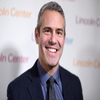

This person looks like a German pinscher




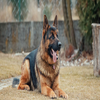

This dog looks like a German shepherd dog




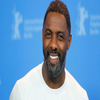

This person looks like a Xoloitzcuintli




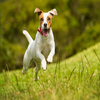

This person looks like a Parson russell terrier




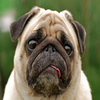

This dog looks like a French bulldog




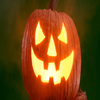

This image does not contain humans or dogs: test_images/pumpkin1.jpg


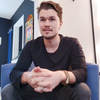

This person looks like a Dachshund




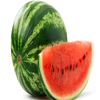

This image does not contain humans or dogs: test_images/watermelon1.jpg


In [88]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from IPython.display import display # to display images

test_image_dir = 'test_images/'
test_image_paths = os.listdir(test_image_dir)
print('Testing run_app on {} images: '.format(len(test_image_paths)))

## suggested code, below
for file in test_image_paths:
    file_path = test_image_dir + file
    display(Image.open(file_path).resize((100, 100), Image.ANTIALIAS))
    run_app(file_path)

### Question 6 Performance answer:

The algorithim performed better that I expected. I actually assumed that it would be thrown off by the halloween pumpkin head. Then again... if it's differentiating between dog breeds, pumkin vs human should be an easy battle! It's really fascinating to me, and apparent from this project, the power of transfer learning. Almost immediately the VGG19 model achieving 60%+ accuracy.

##### 3 Points of improvement:

1) Add additional fully connected layers at the end of the VGG19 model to allow for more detailed differentiation between the given dog breed classes.

2) In this project I used a standard transform when loading my images. Using data augmentation I could have potential better trained the model by giving it more image variants from the training set (further cropped, rotate, flipped, etc...)

3) Further training once the new layers are added. Looking at the current training log, the validation loss hovered at ~0.75 from epoch 15 onward. I believe the the added layers wil significantly help keeping a stronger correlation between the training and validation losses over a longer training period.
